In [5]:
import argparse
import json
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
with open('../src/training_logs/run_dec_14_big_2048.json', "r") as f:
    data = json.load(f)

history = data.get("history", {})
epochs = history.get("epoch", None)
train_loss = history.get("train_loss", None)
train_accuracy = history.get("train_accuracy", None)
val_accuracy = history.get("val_accuracy", None)

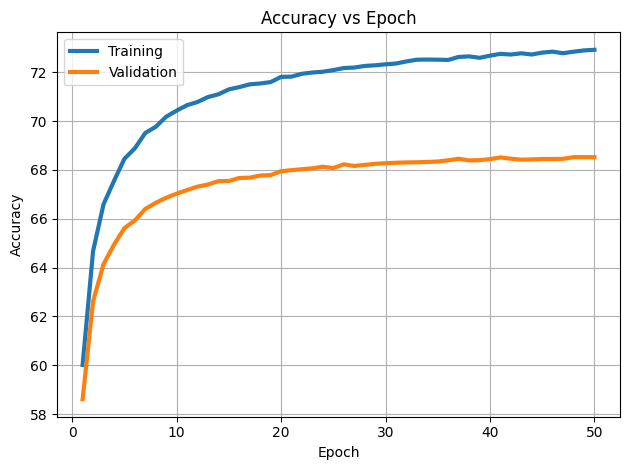

In [31]:
plt.figure()
plt.plot(epochs, train_accuracy, label="Training", linewidth=3)
plt.plot(epochs, val_accuracy, label="Validation", linewidth=3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/accuracy.pdf")


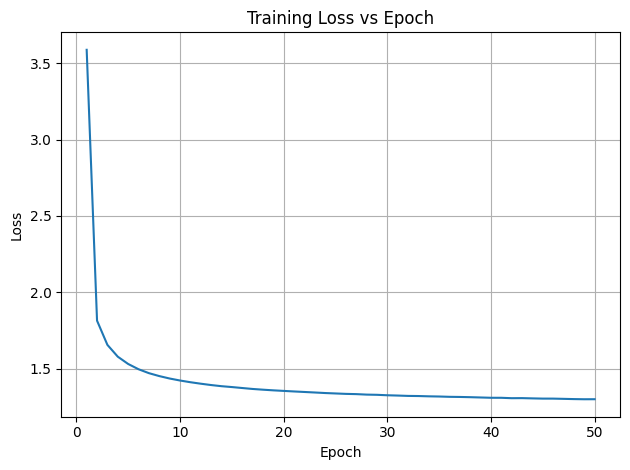

In [29]:
plt.figure()
plt.plot(epochs, train_loss, label="Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epoch")
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/loss.pdf")

In [32]:
from graphviz import Digraph

def create_mlp_diagram():
    # 'TB' = Top to Bottom (Vertical/Rotated 90 layout)
    dot = Digraph(comment='SimpleMLP_2', format='pdf')
    dot.attr(rankdir='TB')
    dot.attr(splines='ortho')
    dot.attr(nodesep='0.4')
    dot.attr(ranksep='0.5')

    # Global node styles
    dot.attr('node', shape='box', style='filled, rounded', fontname='Helvetica', fontsize='12', margin='0.2,0.1')

    # Colors
    color_layer = '#dae8fc' # Light Blue
    color_drop = '#fff2cc'  # Light Yellow
    color_io = '#f5f5f5'    # Light Grey

    # Nodes
    dot.node('input', 'Input (x)\n(B, 768)', fillcolor=color_io)

    # Feature Extractor
    dot.node('lin1', 'Linear\n(768 \u2192 2048)', fillcolor=color_layer)
    dot.node('relu1', 'ReLU', fillcolor=color_layer)
    dot.node('drop', 'Dropout\n(p=0.3)', fillcolor=color_drop)
    dot.node('lin2', 'Linear\n(2048 \u2192 1024)', fillcolor=color_layer)
    dot.node('relu2', 'ReLU', fillcolor=color_layer)

    # Bottleneck representation (optional, helps clarity)
    dot.node('feat', 'Features (z)\n(B, 1024)', fillcolor=color_io, style='dashed, rounded, filled')

    # Classifier
    dot.node('cls', 'CosineClassifier\n(s=30.0)', fillcolor=color_layer)
    dot.node('out', 'Output (Logits)\n(B, num_classes)', fillcolor=color_io)

    # Edges
    dot.edge('input', 'lin1')
    dot.edge('lin1', 'relu1')
    dot.edge('relu1', 'drop')
    dot.edge('drop', 'lin2')
    dot.edge('lin2', 'relu2')
    dot.edge('relu2', 'feat')
    dot.edge('feat', 'cls')
    dot.edge('cls', 'out')

    # Save
    filename = 'simple_mlp_2_architecture'
    dot.render(filename, view=True, cleanup=True)
    print(f"Saved {filename}.pdf")



In [33]:
create_mlp_diagram()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH